In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Discussion: Week 5

## Exercise: More Business Cycle Data

The file `business_cycle_data_actual_trend.csv`, available at https://github.com/letsgoexploring/econ126/raw/master/Data/Csv/business_cycle_data_actual_trend.csv, contains actual and trend data for real GDP per capita, real consumption per capita, real investment per capita, real physical capital per capita, TFP,  hours per capita, real M2 per capita, the rate of PCE (personal consumption expenditures) inflation, the three month T-bill rate, and the unemployment rate at quarterly frequency. The GDP, consumption, investment, capital, and M2 data are in terms of 2012 dollars. Hours is measured as an index with the value in October 2012 set to 100. PCE inflation is measured at the percent change from one year prior. PCE inflation, unemployment, and the T-bill rate are expressed in units of percent.

In this Notebook, you will replicate the work from class 9 but for the following quantities:
* Real GDP per capita
* 3-month T-Bill rate
* PCE inflation rate
* Unemployment rate

Refer to the Notebook from Class 9 for reference: https://github.com/letsgoexploring/econ126/blob/master/Lecture%20Notebooks/Econ126_Class_09.ipynb

## Part (a): Preliminaries

In [2]:
# Read business_cycle_data_actual_trend.csv into a Pandas DataFrame with the first column set as the index and parse_dates=True
df = pd.read_csv('https://github.com/letsgoexploring/econ126/raw/master/Data/Csv/business_cycle_data_actual_trend.csv',index_col=0,parse_dates=True)

# Print the last five rows of the data
df.tail()

,gdp,gdp_trend,consumption,consumption_trend,investment,investment_trend,hours,hours_trend,capital,capital_trend,tfp,tfp_trend,real_m2,real_m2_trend,t_bill_3mo,t_bill_3mo_trend,pce_inflation,pce_inflation_trend,unemployment,unemployment_trend
2019-07-01,73.783132,72.272855,50.165309,49.019365,12.878614,12.525037,105.344295,102.515873,79.687704,79.430858,27.411780,27.360814,0.000051,0.000053,0.019800,0.014278,0.039688,0.018943,0.036000,0.052215
2019-10-01,74.049483,72.347117,50.254751,49.058110,12.709561,12.519089,105.428767,102.221217,80.003596,79.790461,27.458357,27.396872,0.000052,0.000054,0.015767,0.014497,0.040008,0.015080,0.036000,0.053943
2020-01-01,73.222987,72.412037,49.397299,49.090095,12.483490,12.510535,103.941972,101.906176,80.566022,80.151695,27.336596,27.433124,0.000053,0.000055,0.011100,0.014671,0.018833,0.011056,0.038000,0.055803
2020-04-01,66.535376,72.471686,44.643027,49.118421,10.664014,12.500674,90.210557,101.579674,80.802493,80.514333,27.208270,27.469616,0.000060,0.000055,0.001433,0.014820,-0.096568,0.006943,0.130667,0.057744
2020-07-01,71.371904,72.530653,48.552336,49.146390,12.434136,12.490785,97.421248,101.251776,80.549066,80.878406,27.793644,27.506336,0.000062,0.000056,0.001133,0.014960,-0.016645,0.002819,0.088000,0.059703


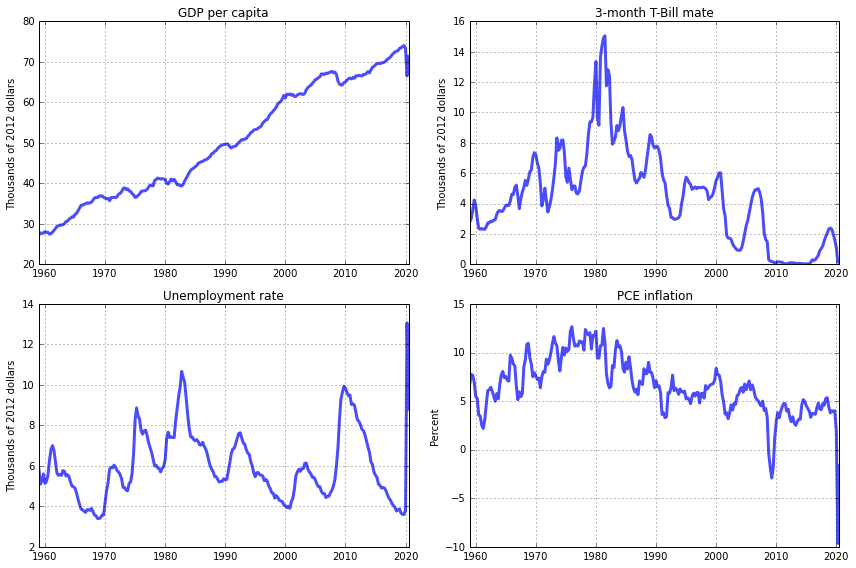

In [3]:
# CELL PROVIDED 
# Construct a 2x2 grid of plots of GDP, consumption, t_bill_3mo, unemployment, and pce_inflation. Multiply
# t_bill_3mo, unemployment, and pce_inflation by 100 inside the plot command to plot in units of percent.
base_year = '2012'
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(2,2,1)
ax1.plot(df.gdp,'-',lw=3,alpha = 0.7)
ax1.grid()
ax1.set_title('GDP per capita')
ax1.set_ylabel('Thousands of '+base_year+' dollars')

ax2 = fig.add_subplot(2,2,2)
ax2.plot(df.t_bill_3mo*100,'-',lw=3,alpha = 0.7)
ax2.grid()
ax2.set_title('3-month T-Bill mate')
ax2.set_ylabel('Thousands of '+base_year+' dollars')

ax3 = fig.add_subplot(2,2,3)
ax3.plot(df.unemployment*100,'-',lw=3,alpha = 0.7)
ax3.grid()
ax3.set_title('Unemployment rate')
ax3.set_ylabel('Thousands of '+base_year+' dollars')

ax4 = fig.add_subplot(2,2,4)
ax4.plot(df.pce_inflation*100,'-',lw=3,alpha = 0.7)
ax4.grid()
ax4.set_title('PCE inflation')
ax4.set_ylabel('Percent')

fig.tight_layout()

## Part (b): Cycles and Trends

Recalle: A time series $X_t$ can be decomposed into a trend component $X_t^{trend}$ and a cyclical component $X_t^{cycle}$ such that:

\begin{align}
X_t & = X_t^{trend} + X_t^{cycle}. \tag{1}
\end{align}

In equation (1), $X_t^{trend}$ is the long-run value about which $X_t$ fluctuates. $X^{cycle}_t$ is the amount by which $X_t$ excedes its trend.

Often times, it's useful to express the cyclical component of a time series as the difference between the (natural) log of the series and the log of the trend:

\begin{align}
\hat{x}_t & = \log\left(X_t\right) - \log\left(X_t^{trend}\right) \approx\frac{X_t-X_t^{trend}}{X_t^{trend}}
\end{align} 

The log-deviation from trend is approximately equal to the percent deviation of the series from trend (divided by 100).

### GDP

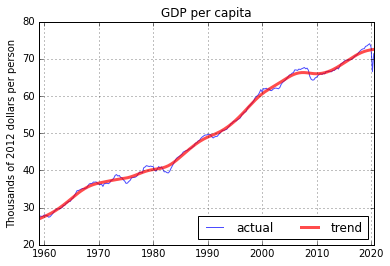

In [4]:
# CELL PROVIDED
# Construct a plot of real GDP with its trend with:
#    1. Actual line: blue with lw=1, alpha=0.7, label = 'actual'
#    2. Trend line:  red with lw=3, alpha=0.7, label = 'trend'
#    3. A legend in an appropriate place
plt.plot(df.gdp,'-',lw=1,alpha = 0.7,label='actual')
plt.plot(df.gdp_trend,'r-',lw=3,alpha = 0.7,label='trend')
plt.grid()
plt.ylabel('Thousands of '+base_year+' dollars per person')
plt.title('GDP per capita')
plt.legend(loc='lower right',ncol=2)

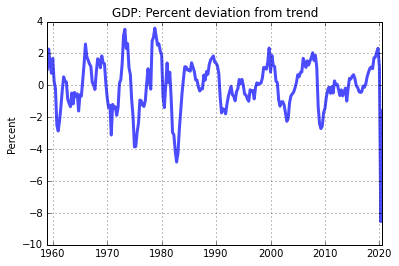

In [5]:
# CELL PROVIDED
# Create a new column called gdp_cycle equal to the log difference between actual GDP and trend GDP:
df['gdp_cycle'] = np.log(df['gdp']) - np.log(df['gdp_trend'])

# Plot the log deviation of GDP from its trend (times 100)
plt.plot(df.gdp_cycle*100,'b-',lw=3,alpha = 0.7)
plt.ylabel('Percent')
plt.title('GDP: Percent deviation from trend')
plt.grid()

### 3-month T-bill rate

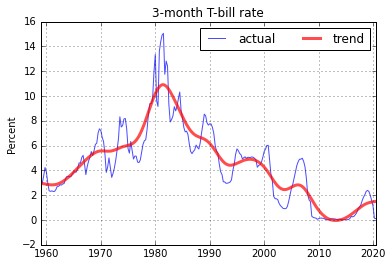

In [6]:
# Construct a plot of the 3-month T-bill rate (times 100) with its trend with:
#    1. Actual line: blue with lw=1, alpha=0.7, label = 'actual'
#    2. Trend line:  red with lw=3, alpha=0.7, label = 'trend'
#    3. A legend in an appropriate place
plt.plot(df.t_bill_3mo*100,'-',lw=1,alpha = 0.7,label='actual')
plt.plot(df.t_bill_3mo_trend*100,'r-',lw=3,alpha = 0.7,label='trend')
plt.ylabel('Percent')
plt.title('3-month T-bill rate')
plt.legend(loc='upper right',ncol=2)
plt.grid()

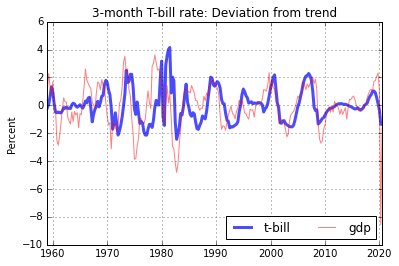

In [7]:
# Create a new column called t_bill_3mo_cycle equal to the DIFFERENCE (not log difference!) between actual 
# 3-month T-bill rate and it's trend:
df['t_bill_3mo_cycle'] = df['t_bill_3mo'] - df['t_bill_3mo_trend']

# Plot the deviation of the 3-month T-bill rate from its trend (times 100)
plt.plot(df.t_bill_3mo_cycle*100,'b-',lw=3,alpha = 0.7,label='t-bill')
plt.plot(df.gdp_cycle*100,'r-',lw=1,alpha = 0.5,label='gdp')
plt.ylabel('Percent')
plt.title('3-month T-bill rate: Deviation from trend')
plt.legend(loc='lower right',ncol=2)
plt.grid()

### Unemployment rate

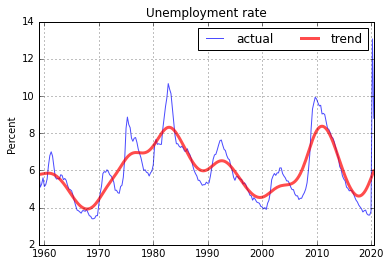

In [8]:
# Construct a plot of the unemployment rate (times 100) with its trend with:
#    1. Actual line: blue with lw=1, alpha=0.7, label = 'actual'
#    2. Trend line:  red with lw=3, alpha=0.7, label = 'trend'
#    3. A legend in an appropriate place
plt.plot(df.unemployment*100,'-',lw=1,alpha = 0.7,label='actual')
plt.plot(df.unemployment_trend*100,'r-',lw=3,alpha = 0.7,label='trend')
plt.ylabel('Percent')
plt.title('Unemployment rate')
plt.legend(loc='upper right',ncol=2)
plt.grid()

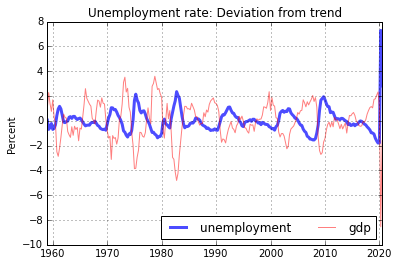

In [9]:
# Create a new column called unemployment_cycle equal to the DIFFERENCE (not log difference!) between actual 
# unemployment and it's trend:
df['unemployment_cycle'] = df['unemployment'] - df['unemployment_trend']

# Plot the deviation of the unemployment rate from its trend (times 100)
plt.plot(df.unemployment_cycle*100,'b-',lw=3,alpha = 0.7,label='unemployment')
plt.plot(df.gdp_cycle*100,'r-',lw=1,alpha = 0.5,label='gdp')
plt.ylabel('Percent')
plt.title('Unemployment rate: Deviation from trend')
plt.legend(loc='lower right',ncol=2)
plt.grid()

### PCE Inflation

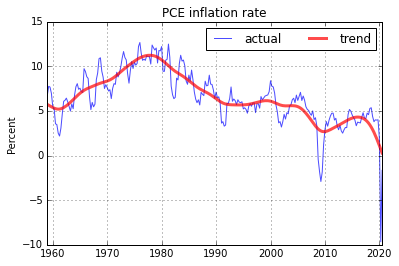

In [10]:
# Construct a plot of the pce_inflation rate (times 100) with its trend with:
#    1. Actual line: blue with lw=1, alpha=0.7, label = 'actual'
#    2. Trend line:  red with lw=3, alpha=0.7, label = 'trend'
#    3. A legend in an appropriate place
plt.plot(df.pce_inflation*100,'-',lw=1,alpha = 0.7,label='actual')
plt.plot(df.pce_inflation_trend*100,'r-',lw=3,alpha = 0.7,label='trend')
plt.ylabel('Percent')
plt.title('PCE inflation rate')
plt.legend(loc='upper right',ncol=2)
plt.grid()

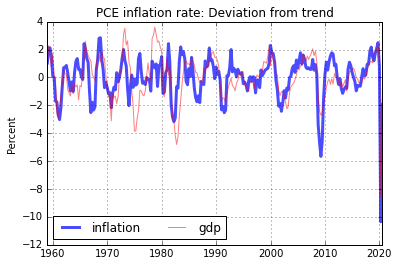

In [11]:
# Create a new column called pce_inflation_cycle equal to the DIFFERENCE (not log difference!) between actual 
# pce_inflation and it's trend:
df['pce_inflation_cycle'] = df['pce_inflation'] - df['pce_inflation_trend']

# Plot the deviation of the PCE inflation rate from its trend (times 100)
plt.plot(df.pce_inflation_cycle*100,'b-',lw=3,alpha = 0.7,label='inflation')
plt.plot(df.gdp_cycle*100,'r-',lw=1,alpha = 0.5,label='gdp')
plt.ylabel('Percent')
plt.title('PCE inflation rate: Deviation from trend')
plt.legend(loc='lower left',ncol=2)
plt.grid()

## Part (c): Statistics

In [12]:
# Create a new variable called df_cycle that is a DataFrame with columns columns gdp_cycle, t_bill_3mo_cycle, 
# pce_inflation_cycle, unemployment_cycle from df.
df_cycle = df[['gdp_cycle', 't_bill_3mo_cycle', 'pce_inflation_cycle', 'unemployment_cycle']]

# Print the first five rows of df_cycle
print(df_cycle.head())

            gdp_cycle  t_bill_3mo_cycle  pce_inflation_cycle  \
1959-01-01   0.010128         -0.001898             0.010258   
1959-04-01   0.022773          0.000568             0.021152   
1959-07-01   0.013910          0.006169             0.021213   
1959-10-01   0.007594          0.013271             0.015073   
1960-01-01   0.016899          0.009906             0.000901   

            unemployment_cycle  
1959-01-01            0.000541  
1959-04-01           -0.006929  
1959-07-01           -0.005399  
1959-10-01           -0.002199  
1960-01-01           -0.006988  


In [13]:
# Use the DataFrame method .mean() to find the average values of the gdp_cycle, t_bill_3mo_cycle, 
# pce_inflation_cycle, unemployment_cycle columns
df_cycle.mean()

gdp_cycle             -8.291703e-14
t_bill_3mo_cycle      -2.597316e-15
pce_inflation_cycle   -2.137151e-15
unemployment_cycle    -1.785487e-15
dtype: float64

In [14]:
# Use the DataFrame method .std() to find the standard deviations of the gdp_cycle, t_bill_3mo_cycle, 
# pce_inflation_cycle, unemployment_cycle columns
df_cycle.std()

gdp_cycle              0.015511
t_bill_3mo_cycle       0.011561
pce_inflation_cycle    0.015042
unemployment_cycle     0.009103
dtype: float64

In [15]:
# Use the DataFrame method .corr() to find the coeficients of correlation among the gdp_cycle, t_bill_3mo_cycle, 
# pce_inflation_cycle, unemployment_cycle columns
df_cycle.corr()

,gdp_cycle,t_bill_3mo_cycle,pce_inflation_cycle,unemployment_cycle
gdp_cycle,1.000000,0.415906,0.640850,-0.858355
t_bill_3mo_cycle,0.415906,1.000000,0.266250,-0.514210
pce_inflation_cycle,0.640850,0.266250,1.000000,-0.554755
unemployment_cycle,-0.858355,-0.514210,-0.554755,1.000000


**Questions**

1. Of the three quantities besides GDP in the columns of `df_cycle`, which varies the most over the business cycle?
2. Of the three quantities besides GDP in the columns of `df_cycle`, which varies the least over the business cycle?
3. Of the three quantities besides GDP in the columns of `df_cycle`, which is most correlated (in absolute value) with GDP over the business cycle?

**Answers**

1. The PCE inflation rate fluctuates the most over the business cycle.<!-- answer -->
2. The unemployment rate fluctuates the least over the business cycle.<!-- answer -->
3. The unemployment rate is the quantity that is most correlated with GDP over the cycle. Since the capital stock changes slowly over time, large fluctuations due primarily to large fluctuations in employment.<!-- answer -->

## Part (d): Bonus

Do the next cell for fun. You won't get extra credit, but do it if you want to and have time.

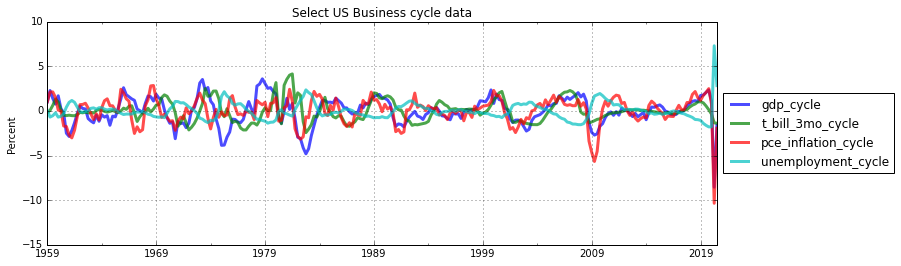

In [16]:
# Plot the cyclical components of GDP, three month T-bill rate, PCE inflation rate, and the unemployment rate
# (all times 100) on the same set of axes
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,1,1)
(df_cycle*100).plot(ax = ax,legend=False,lw=3,alpha=0.7)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('Percent')
ax.set_title('Select US Business cycle data')
ax.grid()